In [25]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pprint as pp
#import os
import ast
import pandas_profiling as p_p
import missingno as mno

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

import gc

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import warnings
warnings.filterwarnings("ignore")

In [26]:
train_df = pd.read_csv('Data/train.csv')
test_df = pd.read_csv('Data/test.csv')



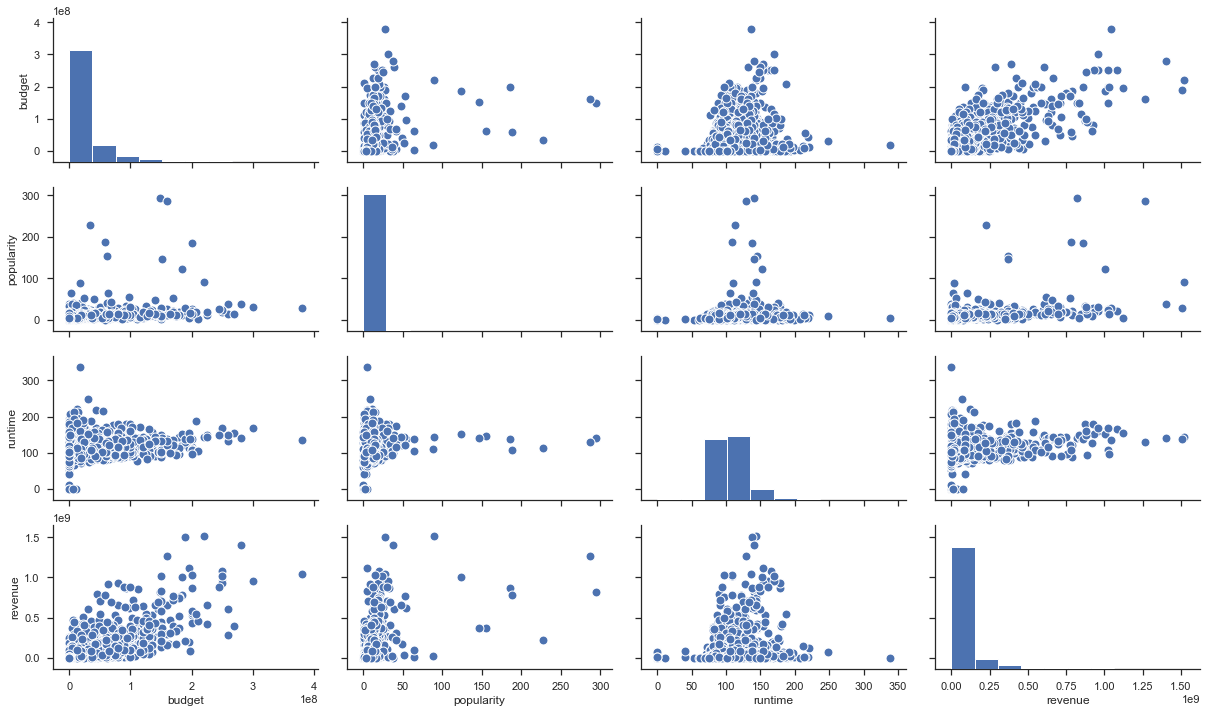

In [58]:

sns.set(style="ticks")

df = train_df[['budget', 'popularity', 'runtime', 'revenue']]
# sns.pairplot(df)

g = sns.PairGrid(df, height=2.5, aspect=1.7)
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter, linewidths=1, edgecolor="w", s=80)
#>>> g = g.map(plt.scatter, linewidths=1, edgecolor="w", s=40)


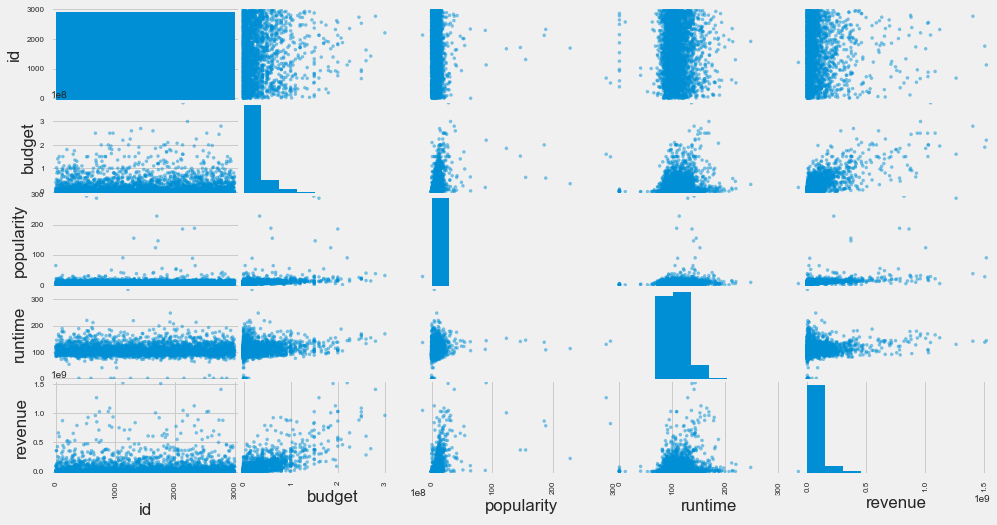

In [24]:
pd.plotting.scatter_matrix(train_df, figsize=(15,8));

In [12]:
train_df.describe()

id        budget   popularity      runtime       revenue
count  3000.000000  3.000000e+03  3000.000000  2998.000000  3.000000e+03
mean   1500.500000  2.253133e+07     8.463274   107.856571  6.672585e+07
std     866.169729  3.702609e+07    12.104000    22.086434  1.375323e+08
min       1.000000  0.000000e+00     0.000001     0.000000  1.000000e+00
25%     750.750000  0.000000e+00     4.018053    94.000000  2.379808e+06
50%    1500.500000  8.000000e+06     7.374861   104.000000  1.680707e+07
75%    2250.250000  2.900000e+07    10.890983   118.000000  6.891920e+07
max    3000.000000  3.800000e+08   294.337037   338.000000  1.519558e+09

In [13]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
id                       3000 non-null int64
belongs_to_collection    604 non-null object
budget                   3000 non-null int64
genres                   2993 non-null object
homepage                 946 non-null object
imdb_id                  3000 non-null object
original_language        3000 non-null object
original_title           3000 non-null object
overview                 2992 non-null object
popularity               3000 non-null float64
poster_path              2999 non-null object
production_companies     2844 non-null object
production_countries     2945 non-null object
release_date             3000 non-null object
runtime                  2998 non-null float64
spoken_languages         2980 non-null object
status                   3000 non-null object
tagline                  2403 non-null object
title                    3000 non-null object
Keywords             

In [16]:
print(len(train_df))
print(train_df.columns)
train_df.shape
#train_df.head(3)

3000
Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue'],
      dtype='object')


(3000, 23)

In [19]:
print(len(test_df))
print(test_df.columns)
test_df.shape
#test_df.head(3)

4398
Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew'],
      dtype='object')


(4398, 22)

In [20]:
mov_columns = ['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue']
len(mov_columns)


23

In [21]:
p_p.ProfileReport(train_df)

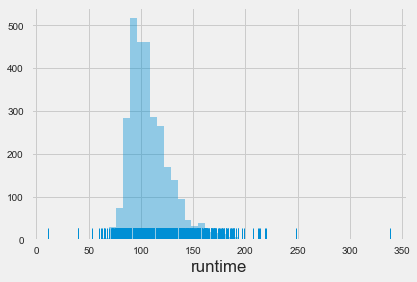

In [22]:
sns.distplot(train_df[train_df.runtime > 0].runtime , kde=False, rug=True);

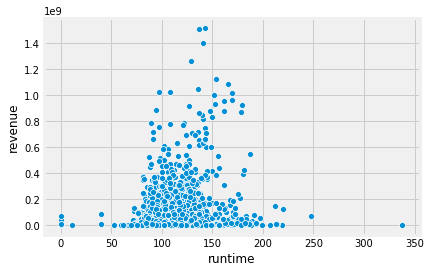

In [146]:
ax = sns.scatterplot(x="runtime", y="revenue", data=train_df)


In [148]:
train_df.corr()

id    budget  popularity   runtime   revenue
id          1.000000  0.019732   -0.007470  0.010750  0.000610
budget      0.019732  1.000000    0.342356  0.238373  0.752965
popularity -0.007470  0.342356    1.000000  0.133690  0.461460
runtime     0.010750  0.238373    0.133690  1.000000  0.216380
revenue     0.000610  0.752965    0.461460  0.216380  1.000000

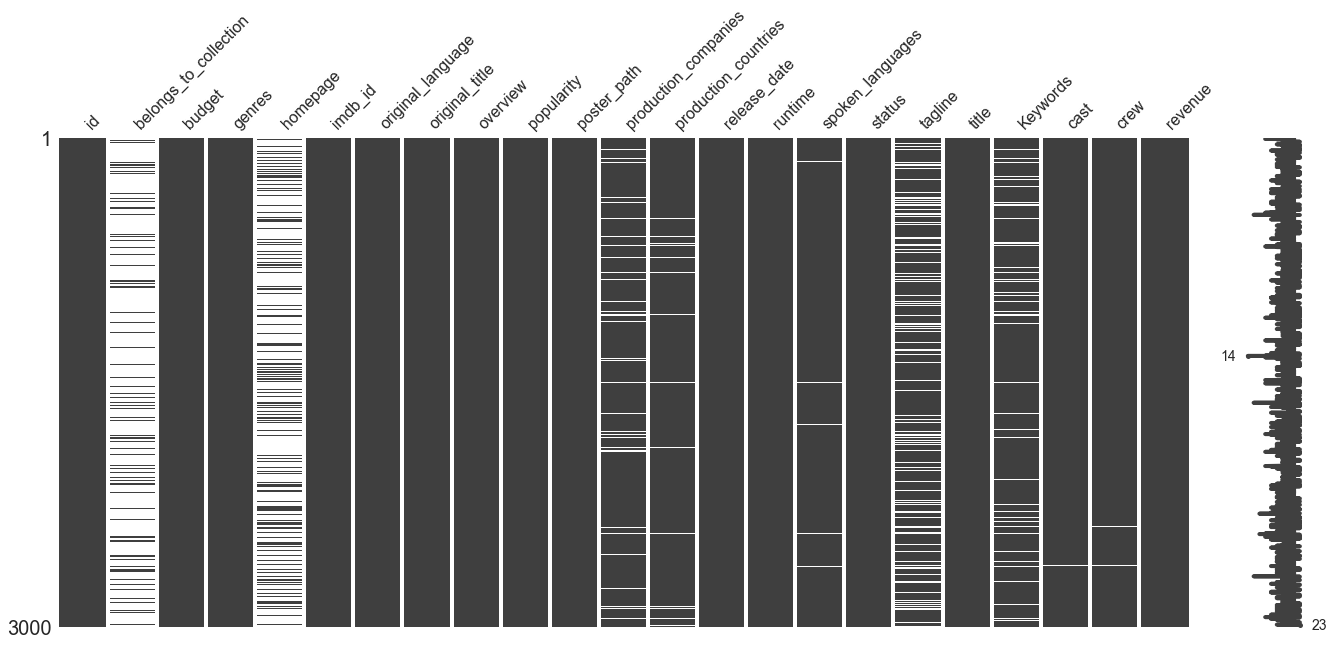

In [8]:
# https://github.com/ResidentMario/missingno
mno.matrix(train_df, figsize = (20, 9));


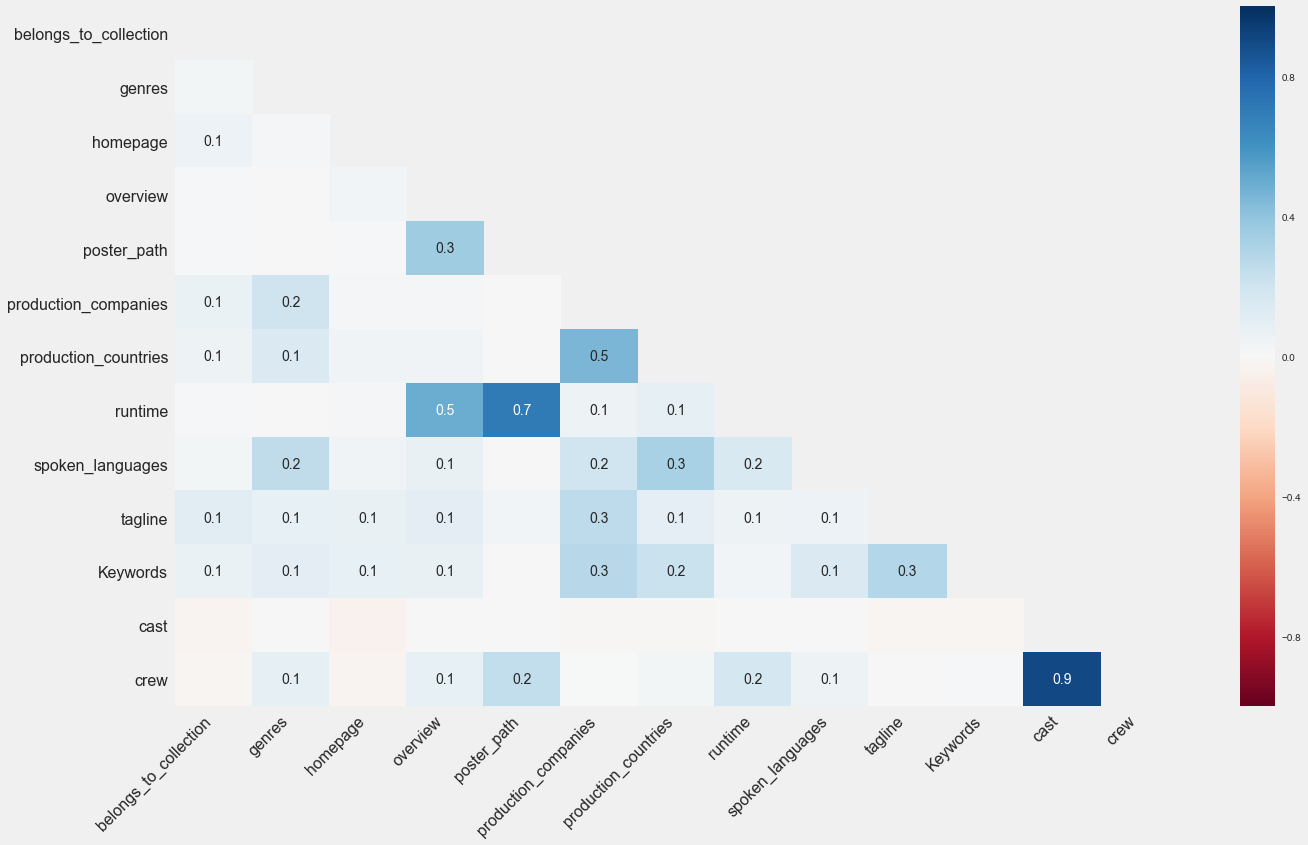

In [156]:
mno.heatmap(train_df);


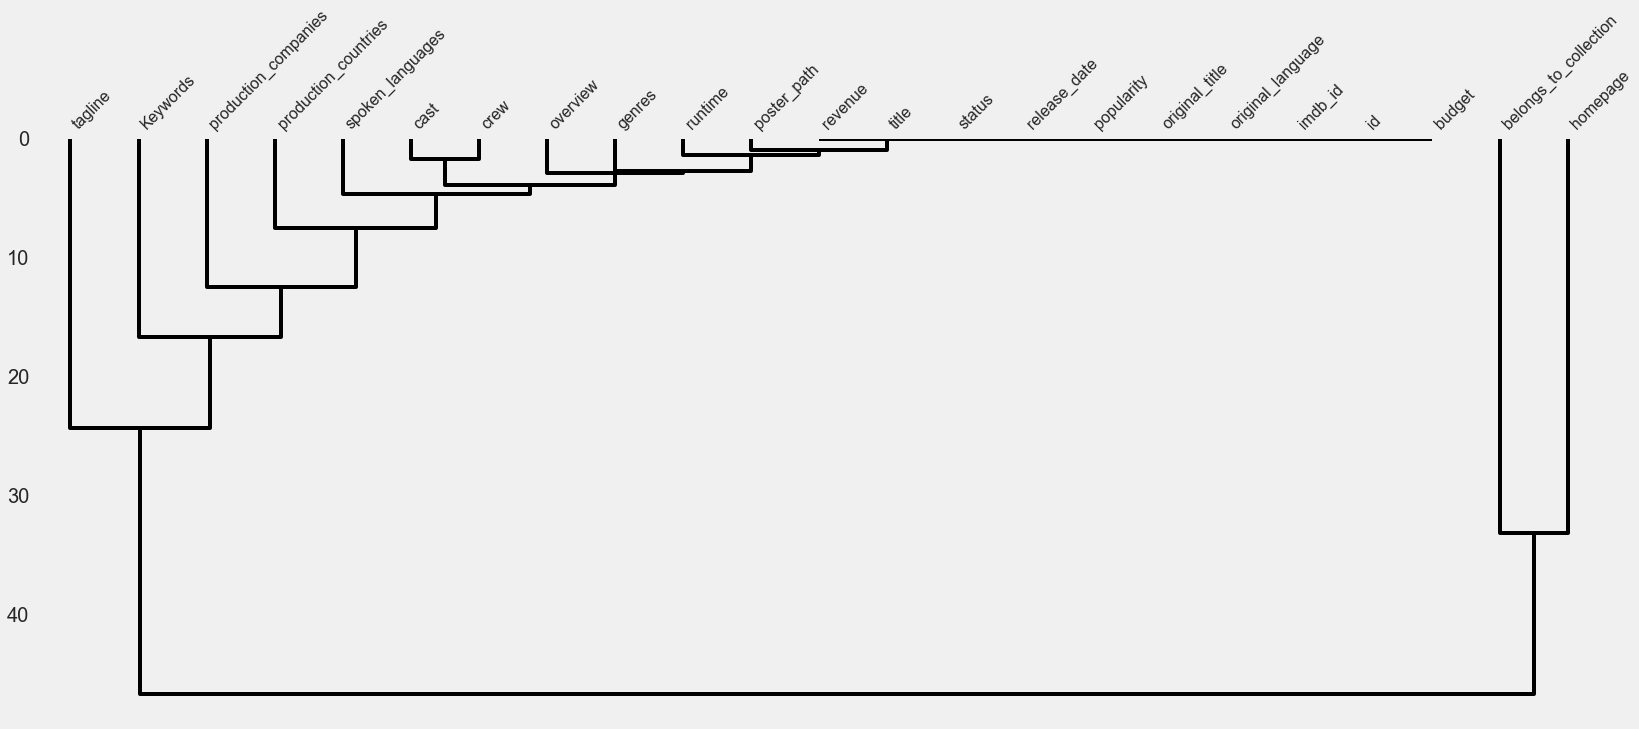

In [158]:
mno.dendrogram(train_df);

In [160]:
train_df.status.value_counts()

Released    2996
Rumored        4
Name: status, dtype: int64

In [161]:
train_df[train_df.status == 'Rumored']

id                              belongs_to_collection  budget  \
609    610  [{'id': 144200, 'name': 'Swan Princess Series'...       0   
1007  1008                                                NaN       0   
1216  1217                                                NaN       0   
1618  1619                                                NaN  891000   

                                                 genres homepage    imdb_id  \
609   [{'id': 14, 'name': 'Fantasy'}, {'id': 16, 'na...      NaN  tt0120254   
1007                     [{'id': 35, 'name': 'Comedy'}]      NaN  tt1860180   
1216  [{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...      NaN  tt0091024   
1618                [{'id': 99, 'name': 'Documentary'}]      NaN  tt0145394   

     original_language                                  original_title  \
609                 en  The Swan Princess: Escape from Castle Mountain   
1007                en                         Billy Gardell: Halftime   
1216                en                                     Extremities   
1618                en                          A Place Called Chiapas   

                                               overview  popularity  ...  \
609   The first wedding anniversary of Princess Odet...    5.121309  ...   
1007  Billy Gardell, the star of CBS' hit comedy "Mi...    0.007877  ...   
1216  A woman escapes from the man who is about to r...   10.273979  ...   
1618  On January 1, 1994, the Zapatista National Lib...    0.179246  ...   

     release_date runtime                                   spoken_languages  \
609        1/1/97    71.0  [{'iso_639_1': 'da', 'name': 'Dansk'}, {'iso_6...   
1007       2/5/11    60.0           [{'iso_639_1': 'en', 'name': 'English'}]   
1216      8/22/86    89.0           [{'iso_639_1': 'en', 'name': 'English'}]   
1618      2/20/98    89.0  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...   

       status                                            tagline  \
609   Rumored  It Will Take All Her Magic to Rescue Her Friends!   
1007  Rumored                                                NaN   
1216  Rumored  When fear made her a victim, she turned fear i...   
1618  Rumored     Inside the world's first postmodern revolution   

                                               title  \
609   The Swan Princess: Escape from Castle Mountain   
1007                         Billy Gardell: Halftime   
1216                                     Extremities   
1618                          A Place Called Chiapas   

                                               Keywords  \
609   [{'id': 3071, 'name': 'prince'}, {'id': 4456, ...   
1007                                                NaN   
1216  [{'id': 2483, 'name': 'nudity'}, {'id': 2539, ...   
1618         [{'id': 187056, 'name': 'woman director'}]   

                                                   cast  \
609   [{'cast_id': 2, 'character': 'Odette (voice)',...   
1007  [{'cast_id': 9, 'character': 'Himself', 'credi...   
1216  [{'cast_id': 1, 'character': 'Marjorie', 'cred...   
1618  [{'cast_id': 1, 'character': 'Himself', 'credi...   

                                                   crew   revenue  
609   [{'credit_id': '52fe488bc3a36847f816cfd3', 'de...    273644  
1007  [{'credit_id': '52fe4be1c3a368484e19d265', 'de...        60  
1216  [{'credit_id': '582cca1c925141780b00259f', 'de...  13418091  
1618  [{'credit_id': '57b4f7619251417287000dfc', 'de...    229000  

[4 rows x 23 columns]

In [7]:
train_df['crew'][88]

"[{'credit_id': '53ff8e680e0a2658de0007f5', 'department': 'Writing', 'gender': 0, 'id': 148659, 'job': 'Screenplay', 'name': 'Angela Workman', 'profile_path': None}, {'credit_id': '55da1a29c3a3683207005312', 'department': 'Directing', 'gender': 1, 'id': 15287, 'job': 'Director', 'name': 'Niki Caro', 'profile_path': '/ooJcmnhX9qJ0E7bCdSQCxr7JViH.jpg'}, {'credit_id': '57a1e617c3a3682cb10015e5', 'department': 'Production', 'gender': 1, 'id': 83002, 'job': 'Executive Producer', 'name': 'Jessica Chastain', 'profile_path': '/eyv98YlnRuOOUNCD1U6w2yZDRA2.jpg'}, {'credit_id': '5831a08492514162cf024798', 'department': 'Writing', 'gender': 0, 'id': 1711462, 'job': 'Book', 'name': 'Diane Ackerman', 'profile_path': None}, {'credit_id': '5831a0f0c3a3685ba802475b', 'department': 'Production', 'gender': 1, 'id': 53680, 'job': 'Casting', 'name': 'Elaine Grainger', 'profile_path': None}, {'credit_id': '582c96b5925141780e0004bb', 'department': 'Editing', 'gender': 2, 'id': 15291, 'job': 'Editor', 'name':

In [132]:
print(train_df.title[880])
train_df.production_countries[880]

Coriolanus


"[{'iso_3166_1': 'IT', 'name': 'Italy'}, {'iso_3166_1': 'CS', 'name': 'Serbia and Montenegro'}, {'iso_3166_1': 'US', 'name': 'United States of America'}]"

In [128]:
print(type(train_df.title[88]))
train_df.production_companies[88]

<class 'str'>


"[{'name': 'Scion Films', 'id': 7419}, {'name': 'LD Entertainment', 'id': 10285}, {'name': 'Czech Anglo Productions', 'id': 20473}]"

In [118]:
train_df.production_companies.value_counts()

[{'name': 'Paramount Pictures', 'id': 4}]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        51
[{'name': 'Universal Pictures', 'id': 33}]                                                                                                                                                                                                                                                                                                                                                                                                                          

In [115]:
train_df.original_title[1000]

'Drop Dead Fred'

In [116]:
train_df.title[1000]

'Drop Dead Fred'

In [117]:
train_df[train_df.title != train_df.original_title]

id                              belongs_to_collection    budget  \
4        5                                                NaN         0   
15      16                                                NaN    500000   
30      31                                                NaN  13000000   
45      46                                                NaN   3906840   
50      51                                                NaN    560000   
56      57                                                NaN         0   
67      68                                                NaN         0   
71      72                                                NaN         0   
73      74                                                NaN         0   
87      88                                                NaN   7500000   
91      92                                                NaN         0   
92      93                                                NaN  35000000   
95      96                                                NaN         0   
96      97                                                NaN   2500000   
97      98                                                NaN         0   
98      99                                                NaN  10500000   
102    103                                                NaN         0   
116    117                                                NaN         0   
119    120                                                NaN  12716953   
125    126                                                NaN  40000000   
134    135                                                NaN  10000000   
156    157  [{'id': 106011, 'name': 'Shadow Boxing Collect...   3500000   
169    170  [{'id': 8945, 'name': 'Mad Max Collection', 'p...   2000000   
183    184                                                NaN   6000000   
195    196                                                NaN         0   
213    214                                                NaN   6700000   
216    217  [{'id': 148065, 'name': 'Doraemon Collection',...  35000000   
220    221                                                NaN  12000000   
237    238  [{'id': 469613, 'name': 'Los Leguineche - Cole...         0   
242    243                                                NaN         0   
...    ...                                                ...       ...   
2698  2699                                                NaN   5000000   
2711  2712                                                NaN  17000000   
2742  2743                                                NaN  20000000   
2747  2748                                                NaN         0   
2750  2751  [{'id': 4563, 'name': 'The Vengeance Collectio...   3000000   
2754  2755                                                NaN         0   
2759  2760                                                NaN         0   
2760  2761                                                NaN  12000000   
2761  2762                                                NaN   1089360   
2765  2766                                                NaN         0   
2767  2768  [{'id': 656, 'name': 'Saw Collection', 'poster...  20000000   
2796  2797                                                NaN  14734000   
2812  2813                                                NaN   2200000   
2849  2850                                                NaN  15000000   
2856  2857                                                NaN  49300000   
2862  2863                                                NaN   2000000   
2864  2865                                                NaN    410000   
2872  2873                                                NaN   5200000   
2885  2886                                                NaN         0   
2900  2901                                                NaN    200000   
2912  2913  [{'id': 23170, 'name': 'Burnt by the Sun Trilo...   2800000   
2924  2925                       

In [113]:
print(train_df.title[1])
train_df.Keywords[1]

The Princess Diaries 2: Royal Engagement


"[{'id': 2505, 'name': 'coronation'}, {'id': 4263, 'name': 'duty'}, {'id': 6038, 'name': 'marriage'}, {'id': 13072, 'name': 'falling in love'}]"

In [102]:
train_df.original_language.value_counts()

en    2575
fr      78
ru      47
es      43
hi      42
ja      37
it      24
ko      20
cn      20
zh      19
de      18
ta      16
sv       8
pt       6
nl       6
fa       5
da       5
ro       4
hu       3
tr       3
pl       2
no       2
te       2
ml       2
fi       2
el       1
bn       1
id       1
mr       1
ar       1
nb       1
sr       1
cs       1
he       1
vi       1
ur       1
Name: original_language, dtype: int64

In [11]:
print (np.count_nonzero(train_df["budget"]))
print (np.count_nonzero(test_df["budget"]))

2188
3187


In [12]:
2188 / 3000   #train data

0.7293333333333333

In [13]:
3187 / 4398  #test data

0.7246475670759436

train_df.budget == 0 is 2188 / 3000  72.93% non-zeros
test_df.budget == 0 is 3187 / 4398   72.46% non-zeros 

In [14]:
all_df = pd.concat([train_df, test_df])
all_df.head()

Keywords  \
0  [{'id': 4379, 'name': 'time travel'}, {'id': 9...   
1  [{'id': 2505, 'name': 'coronation'}, {'id': 42...   
2  [{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...   
3  [{'id': 10092, 'name': 'mystery'}, {'id': 1054...   
4                                                NaN   

                               belongs_to_collection    budget  \
0  [{'id': 313576, 'name': 'Hot Tub Time Machine ...  14000000   
1  [{'id': 107674, 'name': 'The Princess Diaries ...  40000000   
2                                                NaN   3300000   
3                                                NaN   1200000   
4                                                NaN         0   

                                                cast  \
0  [{'cast_id': 4, 'character': 'Lou', 'credit_id...   
1  [{'cast_id': 1, 'character': 'Mia Thermopolis'...   
2  [{'cast_id': 5, 'character': 'Andrew Neimann',...   
3  [{'cast_id': 1, 'character': 'Vidya Bagchi', '...   
4  [{'cast_id': 3, 'character': 'Chun-soo', 'cred...   

                                                crew  \
0  [{'credit_id': '59ac067c92514107af02c8c8', 'de...   
1  [{'credit_id': '52fe43fe9251416c7502563d', 'de...   
2  [{'credit_id': '54d5356ec3a3683ba0000039', 'de...   
3  [{'credit_id': '52fe48779251416c9108d6eb', 'de...   
4  [{'credit_id': '52fe464b9251416c75073b43', 'de...   

                                              genres  \
0                     [{'id': 35, 'name': 'Comedy'}]   
1  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
2                      [{'id': 18, 'name': 'Drama'}]   
3  [{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...   
4  [{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...   

                            homepage  id    imdb_id original_language  ...  \
0                                NaN   1  tt2637294                en  ...   
1                                NaN   2  tt0368933                en  ...   
2  http://sonyclassics.com/whiplash/   3  tt2582802                en  ...   
3         http://kahaanithefilm.com/   4  tt1821480                hi  ...   
4                                NaN   5  tt1380152                ko  ...   

                        poster_path  \
0  /tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg   
1  /w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg   
2  /lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg   
3  /aTXRaPrWSinhcmCrcfJK17urp3F.jpg   
4  /m22s7zvkVFDU9ir56PiiqIEWFdT.jpg   

                                production_companies  \
0  [{'name': 'Paramount Pictures', 'id': 4}, {'na...   
1        [{'name': 'Walt Disney Pictures', 'id': 2}]   
2  [{'name': 'Bold Films', 'id': 2266}, {'name': ...   
3                                                NaN   
4                                                NaN   

                                production_countries release_date     revenue  \
0  [{'iso_3166_1': 'US', 'name': 'United States o...      2/20/15  12314651.0   
1  [{'iso_3166_1': 'US', 'name': 'United States o...       8/6/04  95149435.0   
2  [{'iso_3166_1': 'US', 'name': 'United States o...     10/10/14  13092000.0   
3            [{'iso_3166_1': 'IN', 'name': 'India'}]       3/9/12  16000000.0   
4      [{'iso_3166_1': 'KR', 'name': 'South Korea'}]       2/5/09   3923970.0   

  runtime                                   spoken_languages    status  \
0    93.0           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
1   113.0           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
2   105.0           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
3   122.0  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...  Released   
4   118.0           [{'iso_639_1': 'ko', 'name': '한국어/조선말'}]  Released   

                                             tagline  \
0  The Laws of Space and Time are About to be Vio...   
1  It can take a lifetime to find true love; she'...   
2    The road to greatness can take you to the edge.   
3                                                NaN   
4                                             

In [15]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7398 entries, 0 to 4397
Data columns (total 23 columns):
Keywords                 6729 non-null object
belongs_to_collection    1481 non-null object
budget                   7398 non-null int64
cast                     7372 non-null object
crew                     7360 non-null object
genres                   7375 non-null object
homepage                 2366 non-null object
id                       7398 non-null int64
imdb_id                  7398 non-null object
original_language        7398 non-null object
original_title           7398 non-null object
overview                 7376 non-null object
popularity               7398 non-null float64
poster_path              7396 non-null object
production_companies     6984 non-null object
production_countries     7241 non-null object
release_date             7397 non-null object
revenue                  3000 non-null float64
runtime                  7392 non-null float64
spoken_languages  

In [67]:
train_df.isna().sum()

id                          0
belongs_to_collection    2396
budget                      0
genres                      7
homepage                 2054
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies      156
production_countries       55
release_date                0
runtime                     2
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
dtype: int64

In [69]:
print(train_df.belongs_to_collection.isna().sum())
train_df.belongs_to_collection.value_counts()

2396


[{'id': 645, 'name': 'James Bond Collection', 'poster_path': '/HORpg5CSkmeQlAolx3bKMrKgfi.jpg', 'backdrop_path': '/6VcVl48kNKvdXOZfJPdarlUGOsk.jpg'}]                         16
[{'id': 9735, 'name': 'Friday the 13th Collection', 'poster_path': '/uobgqpLQff9WvxGKE2OSvXv1RHm.jpg', 'backdrop_path': '/c7pMKwv5NzIN6N3KM4L8fYMTtPw.jpg'}]                   7
[{'id': 937, 'name': 'The Pink Panther (Original) Collection', 'poster_path': '/xu6gZ0zGUSR8SC2QLKFaUrX2niM.jpg', 'backdrop_path': '/6KE7AguGR3UqwUn5RkzkoBc3MLy.jpg'}]        6
[{'id': 9338, 'name': 'Police Academy Collection', 'poster_path': '/1VRdXVy2FYlX4EtllnLKWK6kYDJ.jpg', 'backdrop_path': '/RhpI828r9EKPV4x0pyHiqCDZDQ.jpg'}]                     5
[{'id': 34055, 'name': 'Pokémon Collection', 'poster_path': '/j5te0YNZAMXDBnsqTUDKIBEt8iu.jpg', 'backdrop_path': '/iGoYKA0TFfgSoZpG2u5viTJMGfK.jpg'}]                          5
[{'id': 5039, 'name': 'Rambo Collection', 'poster_path': '/feGOEOVrOLyjtEnVa88rQLgD3XY.jpg', 'backdrop_path': '/Yt2

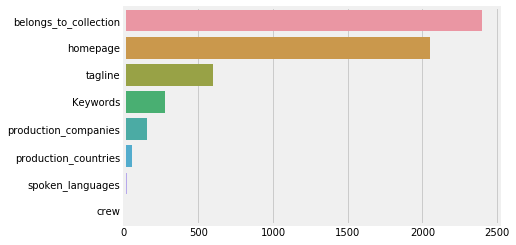

In [16]:
missing=train_df.isna().sum().sort_values(ascending=False)
sns.barplot(missing[:8],missing[:8].index)
plt.show()

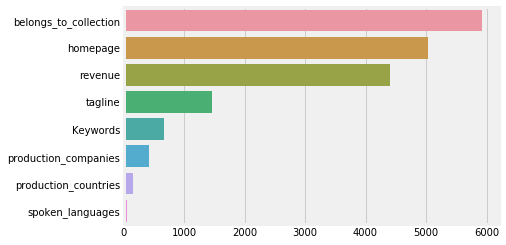

In [17]:
missing=all_df.isna().sum().sort_values(ascending=False)
sns.barplot(missing[:8],missing[:8].index)
plt.show()

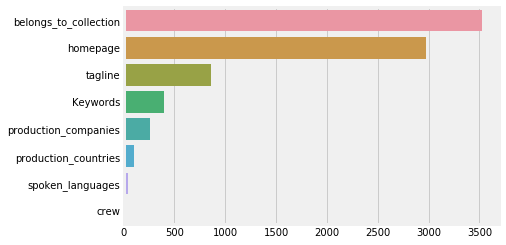

In [18]:
missing=test_df.isna().sum().sort_values(ascending=False)
sns.barplot(missing[:8],missing[:8].index)
plt.show()

In [24]:
train_df['budget'].value_counts().sort_index()

0            812
1              5
2              1
4              1
5              2
6              1
8              1
10             1
12             1
93             1
113            1
130            1
344            1
592            1
2500           1
5000           1
6000           1
7000           1
7300           1
11178          1
12000          1
15000          1
17000          1
20000          1
24554          1
25000          1
27000          1
50000          1
60000          2
65000          1
            ... 
130000000      8
132000000      1
135000000      5
140000000      3
145000000      2
149000000      1
150000000     14
152000000      1
160000000      4
163000000      1
165000000      2
170000000      3
175000000      3
180000000      4
185000000      2
190000000      2
195000000      2
197471676      1
200000000      7
207000000      1
210000000      1
220000000      1
225000000      2
245000000      1
250000000      4
260000000      2
270000000      1
280000000     

In [20]:
all_df['budget'].mean()

22601457.781021897

In [22]:
train_df['budget'].mean()

22531334.11

In [23]:
test_df['budget'].mean()

22649291.11732606

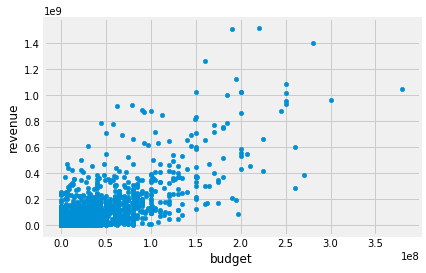

In [27]:
train_df.plot.scatter(x='budget', y='revenue');

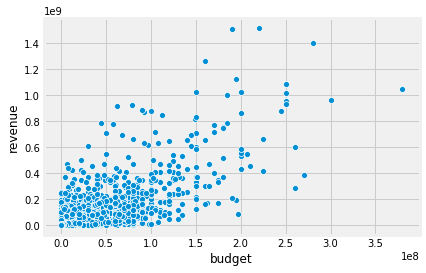

In [30]:
ax = sns.scatterplot(x="budget", y="revenue", data=train_df)


#seaborn.scatterplot(x=None, y=None, hue=None, style=None, size=None, data=None,

In [53]:

gen_str = train_df['genres'][4]
gen_str

"[{'id': 28, 'name': 'Action'}, {'id': 53, 'name': 'Thriller'}]"

In [51]:
genre_list = gen_str.split()
genre_list

["[{'id':",
 '28,',
 "'name':",
 "'Action'},",
 "{'id':",
 '53,',
 "'name':",
 "'Thriller'}]"]

In [64]:
print(ast.literal_eval(gen_str)[0])
len(ast.literal_eval(gen_str))


{'id': 28, 'name': 'Action'}


2

In [66]:
ast.literal_eval(gen_str)[0]['name']


'Action'

In [70]:
train_df.budget < 100

0       False
1       False
2       False
3       False
4        True
5       False
6       False
7        True
8        True
9       False
10      False
11       True
12      False
13      False
14      False
15      False
16      False
17       True
18      False
19      False
20      False
21      False
22       True
23       True
24       True
25       True
26      False
27      False
28      False
29      False
        ...  
2970    False
2971    False
2972     True
2973     True
2974    False
2975    False
2976    False
2977    False
2978     True
2979    False
2980    False
2981     True
2982    False
2983    False
2984    False
2985    False
2986    False
2987     True
2988     True
2989     True
2990     True
2991    False
2992    False
2993    False
2994     True
2995     True
2996     True
2997    False
2998    False
2999    False
Name: budget, Length: 3000, dtype: bool

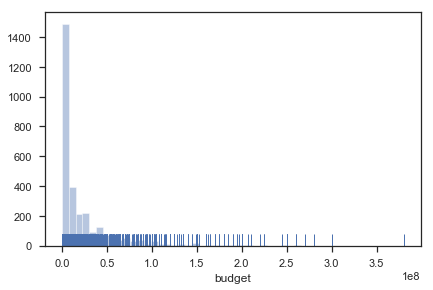

In [67]:
sns.distplot(train_df.budget, kde=False, rug=True, label="$");

In [80]:
train_df[train_df.revenue < 10000].revenue

15       198
33      7171
96      3358
116      311
131     5206
145     9188
150       18
152      241
224      500
269       20
280       10
312       12
313     6297
334        3
347        1
402     8251
403     1469
450       12
494     7306
498       25
579       88
639        8
664       70
665       10
695        2
797     4631
820     9221
886      306
910     2340
928      641
        ... 
1948     204
1964    7406
1977    9069
2032      25
2076    4542
2090      18
2117       4
2201    6147
2251       8
2255     100
2263    7965
2295    5255
2323    7940
2368    7865
2383       3
2384     671
2399      15
2405    3003
2433      32
2474      79
2490       6
2577      97
2582       8
2637    2303
2759      13
2810    8034
2864     100
2874      25
2920    4275
2936    9392
Name: revenue, Length: 92, dtype: int64

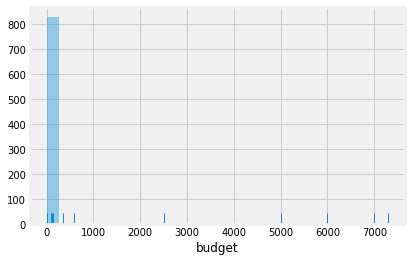

In [90]:
sns.distplot(train_df[train_df.budget < 10000].budget, kde=False, rug=True);

In [98]:
train_df[train_df.budget < 100].budget.count()

826

In [99]:
train_df[train_df.budget < 100].head(10)

id                              belongs_to_collection  budget  \
4    5                                                NaN       0   
7    8                                                NaN       0   
8    9  [{'id': 256377, 'name': 'The Muppet Collection...       0   
11  12  [{'id': 48190, 'name': 'Revenge of the Nerds C...       0   
17  18                                                NaN       0   
22  23  [{'id': 207621, 'name': 'V/H/S Collection', 'p...       0   
23  24                                                NaN       0   
24  25                                                NaN       0   
25  26                                                NaN       0   
31  32                                                NaN       0   

                                               genres  \
4   [{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...   
7                 [{'id': 99, 'name': 'Documentary'}]   
8   [{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...   
11                     [{'id': 35, 'name': 'Comedy'}]   
17  [{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...   
22  [{'id': 53, 'name': 'Thriller'}, {'id': 27, 'n...   
23  [{'id': 53, 'name': 'Thriller'}, {'id': 9648, ...   
24  [{'id': 27, 'name': 'Horror'}, {'id': 35, 'nam...   
25  [{'id': 35, 'name': 'Comedy'}, {'id': 27, 'nam...   
31  [{'id': 9648, 'name': 'Mystery'}, {'id': 18, '...   

                               homepage    imdb_id original_language  \
4                                   NaN  tt1380152                ko   
7                                   NaN  tt0391024                en   
8                                   NaN  tt0117110                en   
11                                  NaN  tt0093857                en   
17                                  NaN  tt1700845                en   
22  http://www.magnetreleasing.com/vhs/  tt2105044                en   
23          http://insightthemovie.com/  tt1687277                en   
24  http://www.blacksheep-themovie.com/  tt0779982                en   
25                                  NaN  tt0104139                en   
31          http://www.cache-derfilm.at  tt0387898                fr   

                                original_title  \
4                                         마린보이   
7                                 Control Room   
8                       Muppet Treasure Island   
11  Revenge of the Nerds II: Nerds in Paradise   
17                         The Invisible Woman   
22                                       V/H/S   
23                                     InSight   
24                                 Black Sheep   
25                                 Dr. Giggles   
31                                       Caché   

                                             overview  popularity  ...  \
4   Marine Boy is the story of a former national s...    1.148070  ...   
7   A chronicle which provides a rare window into ...    1.949044  ...   
8   After telling the story of Flint's last journe...    6.902423  ...   
11  The members of the Lambda Lambda Lambda frater...   10.543750  ...   
17  In 1857, at the height of his fame and fortune...    4.183558  ...   
22  When a group of misfits is hired by an unknown...    7.820787  ...   
23  Kaitlyn, an ER nurse who is tending to a young...    1.323333  ...   
24  A genetic engineering experiment gone horribly...    7.434577  ...   
25  In 1957, Evan Rendell flees after his father i...    1.252367  ...   
31  A married couple is terrorized by a series of ...    5.695860  ...   

   release_date runtime                                   spoken_languages  \
4        2/5/09   118.0           [{'iso_639_1': 'ko', 'name': '한국어/조선말'}]   
7       1/15/04    84.0  [{'iso_639_1': 'ar', 'name': 'العربية'}, {'iso...   
8       2/16/96   100.0           [{'iso_639_1': 'en', 'name': 'English'}]   
11      7/10/87    98.0           [{'iso_639_1': 'en', 'name': 'English'}]   
17     12/25/13   111.0           [{'iso_639_1': 'en', 'name': 'Eng

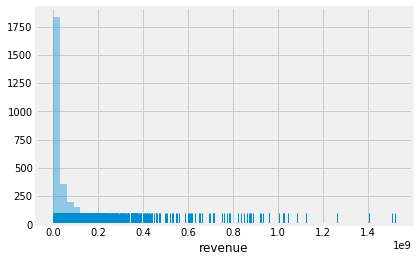

In [72]:
sns.distplot(train_df.revenue[], kde=False, rug=True);

In [75]:
train_df.revenue < qqAQqaaqA10000

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15       True
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
2970    False
2971    False
2972    False
2973    False
2974    False
2975    False
2976    False
2977    False
2978    False
2979    False
2980    False
2981    False
2982    False
2983    False
2984    False
2985    False
2986    False
2987    False
2988    False
2989    False
2990    False
2991    False
2992    False
2993    False
2994    False
2995    False
2996    False
2997    False
2998    False
2999    False
Name: revenue, Length: 3000, dtype: bool